In [1]:
# import xgboost as xgb
import numpy as np
import pandas as pd
from pandas import read_csv, concat
# from xgboost import XGBRegressor
# from xgboost import plot_importance
from matplotlib import pyplot as plt
from numpy import transpose
from sklearn import metrics

In [2]:
X_train = read_csv('./csv/train_modif.csv')
X_test = read_csv('./csv/test_modif.csv')
y_train = X_train.SalePrice.values.astype(int)
del X_train['SalePrice']

In [3]:
X_train.shape[1:]

(313,)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Input(shape = X_train.shape[1]))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
from tensorflow.keras.optimizers import SGD, Adam

loss = 'mse'
LEARNING_RATE = 0.066
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE), metrics=['accuracy'])

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()
scaler.fit(X_train)
y_tr = transpose([y_train])
scaler2.fit(y_tr)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler2.transform(y_tr)

In [7]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 2000 # how many iterations over the whole dataset
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/2000
1460/1460 [==============================] - 0s 82us/sample - loss: 1.0072 - acc: 0.0000e+00
Epoch 2/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.9965 - acc: 0.0000e+00
Epoch 3/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.9942 - acc: 0.0000e+00
Epoch 4/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.9927 - acc: 0.0000e+00
Epoch 5/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.9912 - acc: 0.0000e+00
Epoch 6/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.9898 - acc: 0.0000e+00
Epoch 7/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.9883 - acc: 0.0000e+00
Epoch 8/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.9869 - acc: 0.0000e+00
Epoch 9/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.9854 - acc: 0.0000e+00
Epoch 10/2000
1460/1460 [===

Epoch 78/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.7673 - acc: 0.0000e+00
Epoch 79/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.7603 - acc: 0.0000e+00
Epoch 80/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.7531 - acc: 0.0000e+00
Epoch 81/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.7458 - acc: 0.0000e+00
Epoch 82/2000
1460/1460 [==============================] - 0s 4us/sample - loss: 0.7382 - acc: 0.0000e+00
Epoch 83/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.7305 - acc: 0.0000e+00
Epoch 84/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.7225 - acc: 0.0000e+00
Epoch 85/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.7144 - acc: 0.0000e+00
Epoch 86/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.7062 - acc: 0.0000e+00
Epoch 87/2000
1460/1460 [====================

Epoch 155/2000
1460/1460 [==============================] - 0s 16us/sample - loss: 0.2606 - acc: 0.0000e+00
Epoch 156/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.2586 - acc: 0.0000e+00
Epoch 157/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.2567 - acc: 0.0000e+00
Epoch 158/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.2547 - acc: 0.0000e+00
Epoch 159/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.2529 - acc: 0.0000e+00
Epoch 160/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.2510 - acc: 0.0000e+00
Epoch 161/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.2492 - acc: 0.0000e+00
Epoch 162/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.2474 - acc: 0.0000e+00
Epoch 163/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 0.2456 - acc: 0.0000e+00
Epoch 164/2000
1460/1460 [=========

Epoch 232/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1717 - acc: 0.0000e+00
Epoch 233/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.1711 - acc: 0.0000e+00
Epoch 234/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1705 - acc: 0.0000e+00
Epoch 235/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1699 - acc: 0.0000e+00
Epoch 236/2000
1460/1460 [==============================] - 0s 38us/sample - loss: 0.1694 - acc: 0.0000e+00
Epoch 237/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1688 - acc: 0.0000e+00
Epoch 238/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1682 - acc: 0.0000e+00
Epoch 239/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.1677 - acc: 0.0000e+00
Epoch 240/2000
1460/1460 [==============================] - 0s 23us/sample - loss: 0.1672 - acc: 0.0000e+00
Epoch 241/2000
1460/1460 [========

Epoch 309/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1402 - acc: 0.0000e+00
Epoch 310/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1399 - acc: 0.0000e+00
Epoch 311/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1397 - acc: 0.0000e+00
Epoch 312/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 0.1394 - acc: 0.0000e+00
Epoch 313/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1391 - acc: 0.0000e+00
Epoch 314/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1388 - acc: 0.0000e+00
Epoch 315/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1385 - acc: 0.0000e+00
Epoch 316/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1382 - acc: 0.0000e+00
Epoch 317/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1379 - acc: 0.0000e+00
Epoch 318/2000
1460/1460 [==========

Epoch 386/2000
1460/1460 [==============================] - 0s 16us/sample - loss: 0.1210 - acc: 0.0000e+00
Epoch 387/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1208 - acc: 0.0000e+00
Epoch 388/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.1206 - acc: 0.0000e+00
Epoch 389/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1204 - acc: 0.0000e+00
Epoch 390/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1202 - acc: 0.0000e+00
Epoch 391/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1199 - acc: 0.0000e+00
Epoch 392/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1197 - acc: 0.0000e+00
Epoch 393/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1195 - acc: 0.0000e+00
Epoch 394/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1193 - acc: 0.0000e+00
Epoch 395/2000
1460/1460 [==========

Epoch 463/2000
1460/1460 [==============================] - 0s 18us/sample - loss: 0.1060 - acc: 0.0000e+00
Epoch 464/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1058 - acc: 0.0000e+00
Epoch 465/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1056 - acc: 0.0000e+00
Epoch 466/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1054 - acc: 0.0000e+00
Epoch 467/2000
1460/1460 [==============================] - 0s 4us/sample - loss: 0.1053 - acc: 0.0000e+00
Epoch 468/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.1051 - acc: 0.0000e+00
Epoch 469/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1049 - acc: 0.0000e+00
Epoch 470/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1048 - acc: 0.0000e+00
Epoch 471/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.1046 - acc: 0.0000e+00
Epoch 472/2000
1460/1460 [==========

Epoch 540/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0941 - acc: 0.0000e+00
Epoch 541/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0940 - acc: 0.0000e+00
Epoch 542/2000
1460/1460 [==============================] - 0s 15us/sample - loss: 0.0938 - acc: 0.0000e+00
Epoch 543/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0937 - acc: 0.0000e+00
Epoch 544/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0935 - acc: 0.0000e+00
Epoch 545/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0934 - acc: 0.0000e+00
Epoch 546/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0933 - acc: 0.0000e+00
Epoch 547/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0931 - acc: 0.0000e+00
Epoch 548/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0930 - acc: 0.0000e+00
Epoch 549/2000
1460/1460 [==========

Epoch 617/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0847 - acc: 0.0000e+00
Epoch 618/2000
1460/1460 [==============================] - 0s 13us/sample - loss: 0.0845 - acc: 0.0000e+00
Epoch 619/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0844 - acc: 0.0000e+00
Epoch 620/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0843 - acc: 0.0000e+00
Epoch 621/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0842 - acc: 0.0000e+00
Epoch 622/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0841 - acc: 0.0000e+00
Epoch 623/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0840 - acc: 0.0000e+00
Epoch 624/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0839 - acc: 0.0000e+00
Epoch 625/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0838 - acc: 0.0000e+00
Epoch 626/2000
1460/1460 [==========

Epoch 694/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0770 - acc: 0.0000e+00
Epoch 695/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.0769 - acc: 0.0000e+00
Epoch 696/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0768 - acc: 0.0000e+00
Epoch 697/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0767 - acc: 0.0000e+00
Epoch 698/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0766 - acc: 0.0000e+00
Epoch 699/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0766 - acc: 0.0000e+00
Epoch 700/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0765 - acc: 0.0000e+00
Epoch 701/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0764 - acc: 0.0000e+00
Epoch 702/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0763 - acc: 0.0000e+00
Epoch 703/2000
1460/1460 [==========

Epoch 771/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0707 - acc: 0.0000e+00
Epoch 772/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0706 - acc: 0.0000e+00
Epoch 773/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.0705 - acc: 0.0000e+00
Epoch 774/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0704 - acc: 0.0000e+00
Epoch 775/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0704 - acc: 0.0000e+00
Epoch 776/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0703 - acc: 0.0000e+00
Epoch 777/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0702 - acc: 0.0000e+00
Epoch 778/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0701 - acc: 0.0000e+00
Epoch 779/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0701 - acc: 0.0000e+00
Epoch 780/2000
1460/1460 [==========

Epoch 848/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0654 - acc: 0.0000e+00
Epoch 849/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0653 - acc: 0.0000e+00
Epoch 850/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0653 - acc: 0.0000e+00
Epoch 851/2000
1460/1460 [==============================] - 0s 15us/sample - loss: 0.0652 - acc: 0.0000e+00
Epoch 852/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0651 - acc: 0.0000e+00
Epoch 853/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0651 - acc: 0.0000e+00
Epoch 854/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0650 - acc: 0.0000e+00
Epoch 855/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0649 - acc: 0.0000e+00
Epoch 856/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0649 - acc: 0.0000e+00
Epoch 857/2000
1460/1460 [==========

Epoch 925/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0610 - acc: 0.0000e+00
Epoch 926/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0609 - acc: 0.0000e+00
Epoch 927/2000
1460/1460 [==============================] - 0s 15us/sample - loss: 0.0609 - acc: 0.0000e+00
Epoch 928/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0608 - acc: 0.0000e+00
Epoch 929/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0607 - acc: 0.0000e+00
Epoch 930/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0607 - acc: 0.0000e+00
Epoch 931/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0606 - acc: 0.0000e+00
Epoch 932/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0606 - acc: 0.0000e+00
Epoch 933/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0605 - acc: 0.0000e+00
Epoch 934/2000
1460/1460 [==========

Epoch 1002/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0572 - acc: 0.0000e+00
Epoch 1003/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0571 - acc: 0.0000e+00
Epoch 1004/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0571 - acc: 0.0000e+00
Epoch 1005/2000
1460/1460 [==============================] - 0s 18us/sample - loss: 0.0570 - acc: 0.0000e+00
Epoch 1006/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0570 - acc: 0.0000e+00
Epoch 1007/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0569 - acc: 0.0000e+00
Epoch 1008/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0569 - acc: 0.0000e+00
Epoch 1009/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0569 - acc: 0.0000e+00
Epoch 1010/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0568 - acc: 0.0000e+00
Epoch 1011/2000
1460/1460 [

Epoch 1078/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0539 - acc: 0.0000e+00
Epoch 1079/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0539 - acc: 0.0000e+00
Epoch 1080/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0538 - acc: 0.0000e+00
Epoch 1081/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0538 - acc: 0.0000e+00
Epoch 1082/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0538 - acc: 0.0000e+00
Epoch 1083/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0537 - acc: 0.0000e+00
Epoch 1084/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0537 - acc: 0.0000e+00
Epoch 1085/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0536 - acc: 0.0000e+00
Epoch 1086/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0536 - acc: 0.0000e+00
Epoch 1087/2000
1460/1460 [=

Epoch 1154/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0511 - acc: 0.0000e+00
Epoch 1155/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0510 - acc: 0.0000e+00
Epoch 1156/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0510 - acc: 0.0000e+00
Epoch 1157/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0510 - acc: 0.0000e+00
Epoch 1158/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0509 - acc: 0.0000e+00
Epoch 1159/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0509 - acc: 0.0000e+00
Epoch 1160/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0509 - acc: 0.0000e+00
Epoch 1161/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0508 - acc: 0.0000e+00
Epoch 1162/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0508 - acc: 0.0000e+00
Epoch 1163/2000
1460/1460 [=

Epoch 1230/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0485 - acc: 0.0000e+00
Epoch 1231/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0485 - acc: 0.0000e+00
Epoch 1232/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0485 - acc: 0.0000e+00
Epoch 1233/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0484 - acc: 0.0000e+00
Epoch 1234/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0484 - acc: 0.0000e+00
Epoch 1235/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0484 - acc: 0.0000e+00
Epoch 1236/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0483 - acc: 0.0000e+00
Epoch 1237/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0483 - acc: 0.0000e+00
Epoch 1238/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0483 - acc: 0.0000e+00
Epoch 1239/2000
1460/1460 [

Epoch 1306/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0463 - acc: 0.0000e+00
Epoch 1307/2000
1460/1460 [==============================] - 0s 13us/sample - loss: 0.0462 - acc: 0.0000e+00
Epoch 1308/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0462 - acc: 0.0000e+00
Epoch 1309/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0462 - acc: 0.0000e+00
Epoch 1310/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0462 - acc: 0.0000e+00
Epoch 1311/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0461 - acc: 0.0000e+00
Epoch 1312/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0461 - acc: 0.0000e+00
Epoch 1313/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0461 - acc: 0.0000e+00
Epoch 1314/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0460 - acc: 0.0000e+00
Epoch 1315/2000
1460/1460 [

Epoch 1382/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0442 - acc: 0.0000e+00
Epoch 1383/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0442 - acc: 0.0000e+00
Epoch 1384/2000
1460/1460 [==============================] - 0s 13us/sample - loss: 0.0442 - acc: 0.0000e+00
Epoch 1385/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0441 - acc: 0.0000e+00
Epoch 1386/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0441 - acc: 0.0000e+00
Epoch 1387/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0441 - acc: 0.0000e+00
Epoch 1388/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0441 - acc: 0.0000e+00
Epoch 1389/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0440 - acc: 0.0000e+00
Epoch 1390/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0440 - acc: 0.0000e+00
Epoch 1391/2000
1460/1460 [

Epoch 1458/2000
1460/1460 [==============================] - 0s 14us/sample - loss: 0.0424 - acc: 0.0000e+00
Epoch 1459/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0423 - acc: 0.0000e+00
Epoch 1460/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0423 - acc: 0.0000e+00
Epoch 1461/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0423 - acc: 0.0000e+00
Epoch 1462/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0423 - acc: 0.0000e+00
Epoch 1463/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0422 - acc: 0.0000e+00
Epoch 1464/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0422 - acc: 0.0000e+00
Epoch 1465/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0422 - acc: 0.0000e+00
Epoch 1466/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0422 - acc: 0.0000e+00
Epoch 1467/2000
1460/1460 [

Epoch 1534/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0407 - acc: 0.0000e+00
Epoch 1535/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0406 - acc: 0.0000e+00
Epoch 1536/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0406 - acc: 0.0000e+00
Epoch 1537/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0406 - acc: 0.0000e+00
Epoch 1538/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0406 - acc: 0.0000e+00
Epoch 1539/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0405 - acc: 0.0000e+00
Epoch 1540/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0405 - acc: 0.0000e+00
Epoch 1541/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0405 - acc: 0.0000e+00
Epoch 1542/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0405 - acc: 0.0000e+00
Epoch 1543/2000
1460/1460 [=

Epoch 1610/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0391 - acc: 0.0000e+00
Epoch 1611/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0391 - acc: 0.0000e+00
Epoch 1612/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0390 - acc: 0.0000e+00
Epoch 1613/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0390 - acc: 0.0000e+00
Epoch 1614/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0390 - acc: 0.0000e+00
Epoch 1615/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0390 - acc: 0.0000e+00
Epoch 1616/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0390 - acc: 0.0000e+00
Epoch 1617/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0389 - acc: 0.0000e+00
Epoch 1618/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0389 - acc: 0.0000e+00
Epoch 1619/2000
1460/1460 [=

Epoch 1686/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0376 - acc: 0.0000e+00
Epoch 1687/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0376 - acc: 0.0000e+00
Epoch 1688/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0376 - acc: 0.0000e+00
Epoch 1689/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0376 - acc: 0.0000e+00
Epoch 1690/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0376 - acc: 0.0000e+00
Epoch 1691/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0375 - acc: 0.0000e+00
Epoch 1692/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0375 - acc: 0.0000e+00
Epoch 1693/2000
1460/1460 [==============================] - 0s 4us/sample - loss: 0.0375 - acc: 0.0000e+00
Epoch 1694/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0375 - acc: 0.0000e+00
Epoch 1695/2000
1460/1460 [=

Epoch 1762/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0363 - acc: 0.0000e+00
Epoch 1763/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0363 - acc: 0.0000e+00
Epoch 1764/2000
1460/1460 [==============================] - 0s 21us/sample - loss: 0.0363 - acc: 0.0000e+00
Epoch 1765/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0362 - acc: 0.0000e+00
Epoch 1766/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0362 - acc: 0.0000e+00
Epoch 1767/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0362 - acc: 0.0000e+00
Epoch 1768/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0362 - acc: 0.0000e+00
Epoch 1769/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0362 - acc: 0.0000e+00
Epoch 1770/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0361 - acc: 0.0000e+00
Epoch 1771/2000
1460/1460 [

Epoch 1838/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0350 - acc: 0.0000e+00
Epoch 1839/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0350 - acc: 0.0000e+00
Epoch 1840/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0350 - acc: 0.0000e+00
Epoch 1841/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0350 - acc: 0.0000e+00
Epoch 1842/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0350 - acc: 0.0000e+00
Epoch 1843/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0349 - acc: 0.0000e+00
Epoch 1844/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0349 - acc: 0.0000e+00
Epoch 1845/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0349 - acc: 0.0000e+00
Epoch 1846/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0349 - acc: 0.0000e+00
Epoch 1847/2000
1460/1460 [=

Epoch 1914/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0339 - acc: 0.0000e+00
Epoch 1915/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0338 - acc: 0.0000e+00
Epoch 1916/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0338 - acc: 0.0000e+00
Epoch 1917/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0338 - acc: 0.0000e+00
Epoch 1918/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0338 - acc: 0.0000e+00
Epoch 1919/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0338 - acc: 0.0000e+00
Epoch 1920/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0338 - acc: 0.0000e+00
Epoch 1921/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0337 - acc: 0.0000e+00
Epoch 1922/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0337 - acc: 0.0000e+00
Epoch 1923/2000
1460/1460 [=

Epoch 1990/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0327 - acc: 0.0000e+00
Epoch 1991/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0327 - acc: 0.0000e+00
Epoch 1992/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0327 - acc: 0.0000e+00
Epoch 1993/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0327 - acc: 0.0000e+00
Epoch 1994/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0327 - acc: 0.0000e+00
Epoch 1995/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0327 - acc: 0.0000e+00
Epoch 1996/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0327 - acc: 0.0000e+00
Epoch 1997/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0326 - acc: 0.0000e+00
Epoch 1998/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0326 - acc: 0.0000e+00
Epoch 1999/2000
1460/1460 [=

<IPython.core.display.Javascript object>


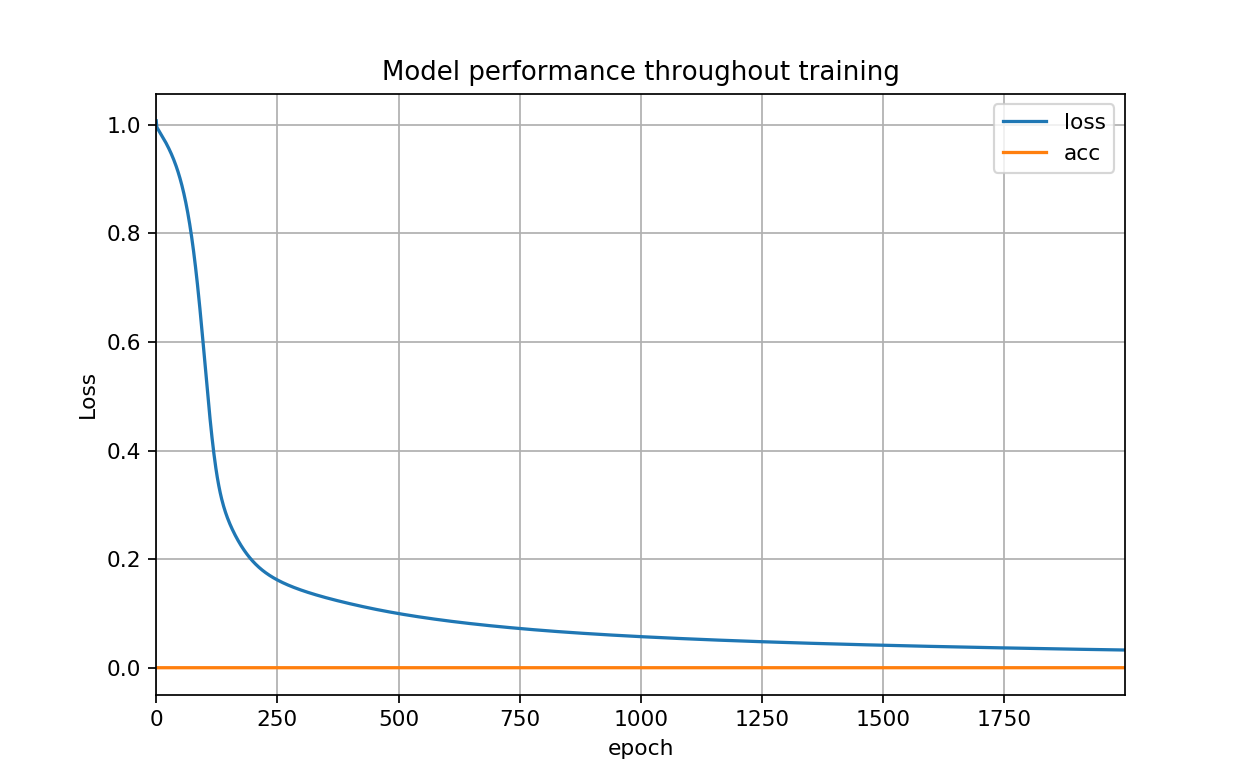

In [8]:
import pandas as pd
%matplotlib notebook

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [9]:
y_predict = model.predict(X_train)

In [10]:
metrics.mean_absolute_error(scaler2.inverse_transform(y_train), scaler2.inverse_transform(y_predict))

9766.460905393835

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred = y_pred.reshape(y_pred.shape[0])
y_pred_trans = scaler2.inverse_transform(y_pred)

In [13]:
submission = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice':y_pred_trans})
submission

,Id,SalePrice
0,1461,127801.375000
1,1462,159389.250000
2,1463,182469.453125
3,1464,194359.906250
4,1465,205698.765625
...,...,...
1454,2915,84671.476562
1455,2916,94038.093750
1456,2917,159031.546875
1457,2918,110682.265625


In [14]:
submission.to_csv('./csv/prediction.csv', index=False)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               31400     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 36,971
Trainable params: 36,971
Non-trainable params: 0
_________________________________________________________________
